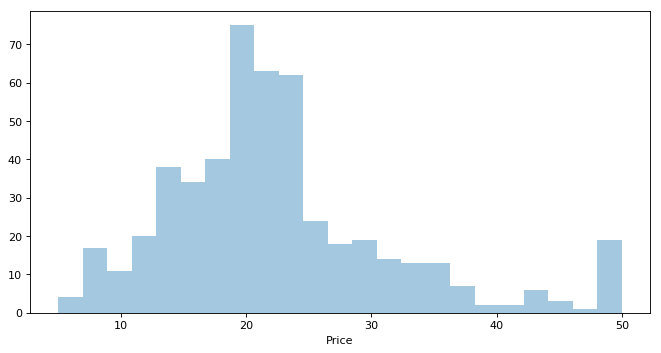

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#绘制原始数据集中价格分布的直方图
dataall=pd.read_excel('dataall.xls')#导入原始数据集
plt.figure(figsize=(10, 5), dpi=80) 
sns.distplot(dataall['Price'],kde=False)
plt.show()  

In [35]:
#从直方图中可以观察出有十几个Price=50的异常点，将这些点去除得的新的数据集data.xls
import numpy as np

data = pd.read_excel('data.xls')
#features =data[:,:-1] #取出所以数据的前十三项作为特征值
#price = data[:,-1]  #取出数据的最后一项作为房价价格
#计算每个特征与价格的相关系数,可以看出特征E,F,J,K,M这五个特征与Price的相关系数大于0.5
c=data.corr()['Price']
print(c)

A       -0.449980
B        0.399292
C       -0.430645
D        0.074970
E       -0.524424
F        0.686566
G       -0.492900
H        0.384093
I        0.135571
J       -0.572345
K       -0.518989
L        0.364762
M       -0.760197
Price    1.000000
Name: Price, dtype: float64


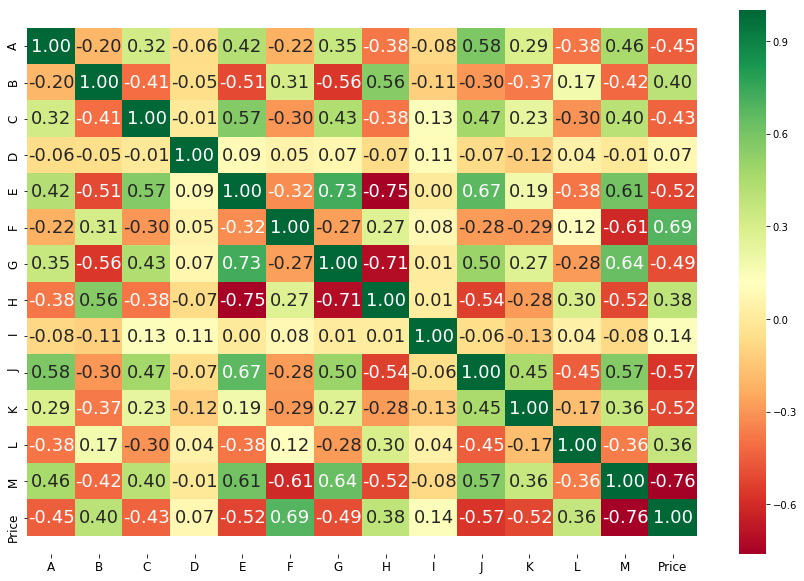

In [36]:
#通过热图可以画出特征与特征，特征与价格间相关系数的热图
import seaborn as sns

plt.figure(figsize=(15, 10))
ax = sns.heatmap(data.corr(), cmap=plt.cm.RdYlGn, annot=True, fmt=".2f", annot_kws={'size':18}) 

# 设置刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 可手动调整y轴的范围来进行修复。
a, b = ax.get_ylim()
ax.set_ylim(a + 0.5, b - 0.5) 
plt.show()

(489, 5)
(489,)
0.7302009390976554


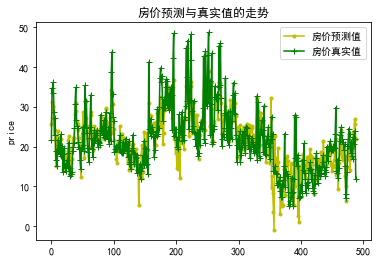

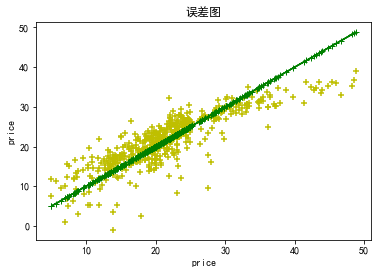

In [47]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#房价走势图 
def show1(price_test,predict_price):
    x=range(len(predict_price))
    plt.plot(x,predict_price,color='y', marker='.')
    plt.plot(x,price_test,color='g', marker='+')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False #属性配置,用来解决图表中显示不出中文的情况
    plt.ylabel('price')
    plt.legend(['房价预测值','房价真实值'])
    plt.title('房价预测与真实值的走势')
    plt.show()

#模型可视化，用于评估预测价格与真实价格之间的误差，黄色点越接近绿色直线，说明预测价格更接近真实价格     
def show2(price_test,predict_price):
    plt.scatter( price_test,predict_price,color='y',marker='+')
    plt.plot(price_test,price_test,color='g', marker='+')
    plt.xlabel('price')
    plt.ylabel('price')
    plt.title('误差图')
    plt.show()


data2=pd.read_excel('data.xls')
#print(data2)

#根据散点图分析，取相关系数的绝对值大于0.5的特征,将其余不相关特征移除。
x=data2.loc[:,['B','F','J','K','M']]
print(x.shape)
y=data2.loc[:,'Price']
print(y.shape)

l=LinearRegression()
l.fit(x,y)
y_predict=l.predict(x)

#predict_price1= clf1.predict(features_test)
r2=l.score(x,y)
print(r2)

show1(y,y_predict)
show2(y,y_predict)